In [1]:
import numpy as np
import pandas as pd
import scipy
import itertools
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

from ast import literal_eval
import os
import pandas as pd


In [2]:


import os
import pandas as pd

df_movies = pd.read_csv('/Users/ir3n3br4t515/Desktop/movies_metadata.csv')
df_ratings = pd.read_csv('/Users/ir3n3br4t515/Desktop/ratings.csv')
df_links = pd.read_csv('/Users/ir3n3br4t515/Desktop/links.csv')


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
list (df_movies.genres)

["[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",
 "[{'id': 35, 'name': 'Comedy'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10

In [109]:
from ast import literal_eval
# the following line should only be run single time!
df_movies["genres"] = df_movies.genres.apply(lambda x: literal_eval(x))
df_movies.genres.apply(lambda x: [el["name"] for el in x])

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genres, Length: 45466, dtype: object

In [ ]:
#Your genres column contains a list but it shows up a string. So df_movies["genres"] = df_movies.genres.apply(lambda x: literal_eval(x))
#line converts it to list. This is why you need to run this only one time.

In [111]:

unique_genres = set()
for col in df_movies.genres:
    for genr in col:
        unique_genres.add(genr)

print(unique_genres)

# run the following line only once
df_movies = df_movies.append(pd.DataFrame(columns = unique_genres))
df_movies[list(unique_genres)] = 0

for i, row in df_movies.iterrows():
    df_movies.loc[i, df_movies.iloc[i,:]["genres"]] = 1

TypeError: unhashable type: 'dict'

In [ ]:
all_genres_list = list(df_filtered['genreslist'])
merged = list(itertools.chain(* all_genres_list ))
unique_genres = list(set(merged))

### The dataset has the following features:

budget - The budget in which the movie was made.<br>
genre - The genre of the movie, Action, Comedy ,Thriller etc.<br>
homepage - A link to the homepage of the movie.<br>
id - This is infact the movie_id as in the first dataset.<br>
keywords - The keywords or tags related to the movie.<br>
original_language - The language in which the movie was made.<br>
original_title - The title of the movie before translation or adaptation.<br>
overview - A brief description of the movie.<br>
popularity - A numeric quantity specifying the movie popularity.<br>
production_companies - The production house of the movie.<br>
production_countries - The country in which it was produced.<br>
release_date - The date on which it was released.<br>
revenue - The worldwide revenue generated by the movie.<br>
runtime - The running time of the movie in minutes.<br>
status - "Released" or "Rumored".<br>
tagline - Movie's tagline.<br>
title - Title of the movie.<br>
vote_average - average ratings the movie recieved.<br>
vote_count - the count of votes recieved.<br>

#this is supposed to separate the genres. 
import pandas as pd chances = {"bumpy": {"red": 4, "yellow": 2, "green": 1}, "smooth": {"red": 1, "yellow": 1, "green": 1}} c = pd.Series(chances) feature = [d.get('red') for d in c] print(feature)



In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [7]:
df_movies.budget = df_movies.budget[df_movies.budget.str.isdigit()]
df_movies.id = df_movies.id[df_movies.id.str.isdigit()]


In [8]:
df_movies.budget = df_movies.budget.fillna(0).astype(np.int64)
df_movies.id = df_movies.id.fillna(0).astype(np.int64)
df_movies.revenue = df_movies.revenue.fillna(0).astype(np.int64)


In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null int64
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null int64
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45466 non-null int64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null object
ta

In [10]:
df_movies.isnull().sum()


adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      0
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [11]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], errors = 'coerce').dt.year




In [93]:
Int_Movies = df_movies.groupby('id').mean()
final_df = Int_Movies.fillna(0, inplace = True ) 

#budget, maybe fill it in with average budget. Never going to have a budget, revenue or runtime of 0 so we may want to fill those in with something else. Come up with some better values. Or other option is how many rows remain if we drop NA.  

In [13]:
Int_Movies.head()

,budget,release_date,revenue,runtime,vote_average,vote_count
id,,,,,,
0,0,0.0,0,0.0,0.0,0.0
2,0,1988.0,0,69.0,7.1,44.0
3,0,1986.0,0,76.0,7.1,35.0
5,4000000,1995.0,4300000,98.0,6.5,539.0
6,0,1993.0,12136938,110.0,6.4,79.0


In [108]:
Int_Movies['title'] = df_movies['title']

In [96]:

Int_Movies.head()

,budget,release_date,revenue,runtime,vote_average,vote_count
id,,,,,,
0,0,0.0,0,0.0,0.0,0.0
2,0,1988.0,0,69.0,7.1,44.0
3,0,1986.0,0,76.0,7.1,35.0
5,4000000,1995.0,4300000,98.0,6.5,539.0
6,0,1993.0,12136938,110.0,6.4,79.0


In [97]:
Int_Movies.corr()

,budget,release_date,revenue,runtime,vote_average,vote_count
budget,1.000000,0.045036,0.768826,0.135716,0.073531,0.676701
release_date,0.045036,1.000000,0.030781,0.066473,0.079146,0.037566
revenue,0.768826,0.030781,1.000000,0.104607,0.083896,0.812032
runtime,0.135716,0.066473,0.104607,1.000000,0.168355,0.114659
vote_average,0.073531,0.079146,0.083896,0.168355,1.000000,0.123622
vote_count,0.676701,0.037566,0.812032,0.114659,0.123622,1.000000


In [98]:
for col in Int_Movies.columns: 
    print(col) 

budget
release_date
revenue
runtime
vote_average
vote_count


In [99]:
Int_Movies.head()

,budget,release_date,revenue,runtime,vote_average,vote_count
id,,,,,,
0,0,0.0,0,0.0,0.0,0.0
2,0,1988.0,0,69.0,7.1,44.0
3,0,1986.0,0,76.0,7.1,35.0
5,4000000,1995.0,4300000,98.0,6.5,539.0
6,0,1993.0,12136938,110.0,6.4,79.0


### OK! Now we are ready to start clustering and finally getting to the "Unsupervised" part of this capstone. Let's create our X2 parameters first. This is an extension of our original notebook where we had X as our original list. The issue with that was how much we were seeing clustering around the year. By removing the year category from our list of variables, hopefully we will find new clusters and new insights! 



In [100]:
#Suspicious about the clustering around certain decades, removing it from this list of X2
X2 = Int_Movies[['budget',
'release_date',
'revenue',
'runtime',
'vote_average',
'vote_count',]]


### How many clusters is best for us? According to our Elbow Visualizer, 7!

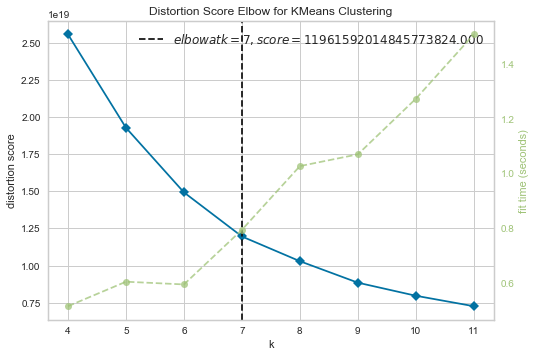

In [101]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Ok. Now let's also scale our data.

In [102]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=7)

### Creating our clustering model below:

In [103]:
# Import KMeans
from sklearn.cluster import KMeans

model = KMeans(n_clusters=7)

# Fit model to points
model.fit(X2)

# Determine the cluster labels of new_points: labels
labels = model.predict(X2)

# Print cluster labels of new_points
print(labels)

[0 0 0 ... 0 0 0]


In [104]:
Int_Movies['Label'] = labels 
print (Int_Movies['Label'])

id
0         0
2         0
3         0
5         0
6         0
         ..
465044    0
467731    0
468343    0
468707    0
469172    0
Name: Label, Length: 45434, dtype: int32


### Let's redefine X2 with our labels included and call that X3. 



In [105]:
#Suspicious about the clustering around certain decades, removing it from this list of X2
X3 = Int_Movies[['Label', 'budget',
'release_date',
'revenue',
'runtime',
'vote_average',
'vote_count',]]


In [94]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X2)

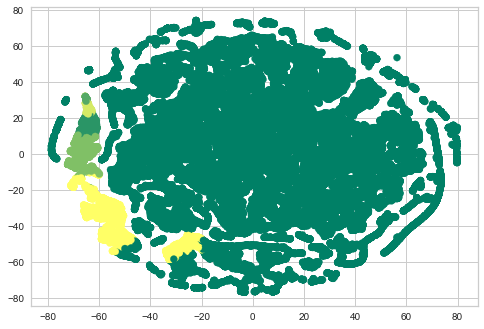

In [106]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c = labels, cmap = 'summer')
plt.show()

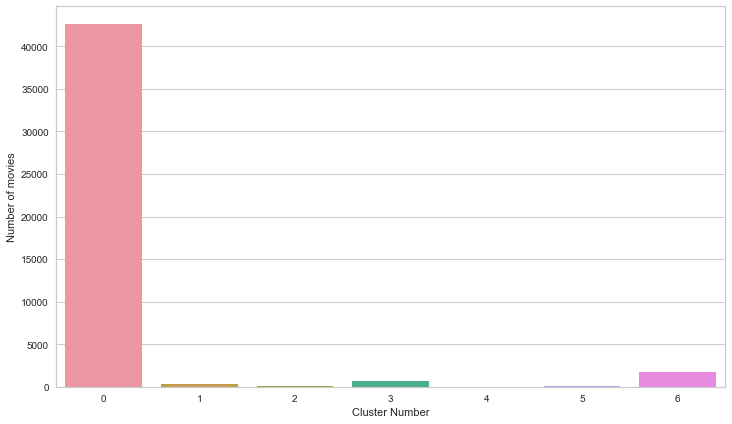

In [107]:


plt.figure(figsize=(12,7))
axis = sns.barplot(x= np.arange(0,7,1),y=Int_Movies.groupby(['Label']).count()['budget'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [32]:
Int_Movies.groupby(['Label']).mean()


,budget,release_date,revenue,runtime,vote_average,vote_count
Label,,,,,,
0,1.167412e+06,1987.045699,8.756285e+05,92.283288,5.568462,36.383497
1,1.325785e+08,2008.097345,6.568352e+08,120.265487,6.850442,4439.451327
2,9.188469e+07,2004.340136,3.595284e+08,117.040816,6.543537,2393.931973
3,3.003409e+07,2001.261822,6.378099e+07,110.843137,6.256805,601.930796
4,2.273333e+08,2007.000000,2.233741e+09,164.000000,7.400000,9292.333333
5,1.784510e+08,2010.568627,1.046458e+09,133.862745,7.043137,5712.431373
6,5.662262e+07,2003.433628,1.792672e+08,113.107670,6.361062,1294.162242


### We see that one cluster which is also the smallest, is the cluster of movies that received maximum number of votes(in terms of counts) and also have very high popularity and total runtime and net revenue. Let's see some of the movies that belong to this cluster.

In [33]:
size_array = list(Int_Movies.groupby(['Label']).count()['budget'].values)
size_array


[42561, 113, 294, 1734, 3, 51, 678]

In [91]:
Int_Movies[Int_Movies['Label']==size_array.index(sorted(size_array)[0])].sample(3)


,budget,release_date,revenue,runtime,vote_average,vote_count,title,Label
id,,,,,,,,
19995,237000000,2009.0,2787965087,162.0,7.2,12114.0,Rebellion,4
140607,245000000,2015.0,2068223624,136.0,7.5,7993.0,NaN,4
597,200000000,1997.0,1845034188,194.0,7.5,7770.0,One Fine Day,4


In [37]:
Int_Movies[Int_Movies['Label']==size_array.index(sorted(size_array)[1])].sample(5)



,budget,release_date,revenue,runtime,vote_average,vote_count,title,Label
id,,,,,,,,
109445,150000000,2013.0,1274219009,102.0,7.3,5440.0,NaN,5
767,250000000,2009.0,933959197,153.0,7.4,5435.0,The Gate of Heavenly Peace,5
12444,250000000,2010.0,954305868,146.0,7.5,5708.0,Horton Hears a Who!,5
206647,245000000,2015.0,880674609,148.0,6.3,4552.0,NaN,5
68721,200000000,2013.0,1215439994,130.0,6.8,8951.0,NaN,5


In [36]:
Int_Movies[Int_Movies['Label']==size_array.index(sorted(size_array)[-1])].sample(5)


,budget,release_date,revenue,runtime,vote_average,vote_count,title,Label
id,,,,,,,,
278772,50,2014.0,0,110.0,5.0,7.0,NaN,0
37447,0,1990.0,0,117.0,4.3,2.0,The Ouija Exorcism,0
454361,0,2017.0,0,65.0,7.0,5.0,NaN,0
50861,0,1929.0,0,19.0,7.1,14.0,NaN,0
996,927262,1944.0,2500000,107.0,8.0,425.0,The Sword in the Stone,0


In [39]:
Int_Movies[Int_Movies['Label']==size_array.index(sorted(size_array)[-2])].sample(5)


,budget,release_date,revenue,runtime,vote_average,vote_count,title,Label
id,,,,,,,,
227348,5000000,2014.0,86362372,84.0,5.2,455.0,NaN,3
307081,30000000,2015.0,91709827,123.0,7.3,2112.0,NaN,3
127533,0,2012.0,61700000,134.0,7.2,174.0,NaN,3
11247,19000000,2004.0,70067909,95.0,6.1,737.0,Time to Leave,3
1880,4200000,1984.0,38376497,114.0,6.4,217.0,Prom Night III: The Last Kiss,3


In [40]:
Int_Movies[Int_Movies['Label']==size_array.index(sorted(size_array)[2])].sample(5)


,budget,release_date,revenue,runtime,vote_average,vote_count,title,Label
id,,,,,,,,
51497,125000000,2011.0,626137675,130.0,7.1,2491.0,NaN,1
602,75000000,1996.0,816969268,145.0,6.7,3334.0,Heavy Metal,1
693,80000000,2004.0,516642939,115.0,6.1,1412.0,Mulholland Falls,1
72105,50000000,2012.0,549368315,106.0,6.3,4811.0,NaN,1
335988,260000000,2017.0,604942143,149.0,6.2,1440.0,NaN,1


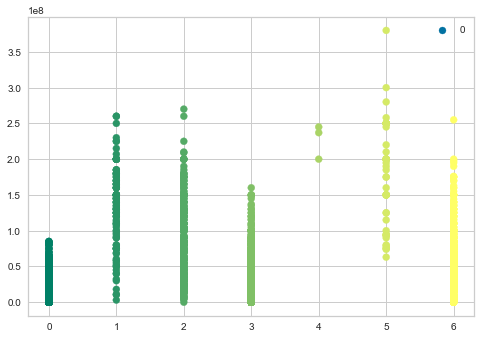

In [43]:
plt.scatter(X3['Label'], X3['budget'], c = labels, cmap = 'summer' )
plt.legend(labels)

plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


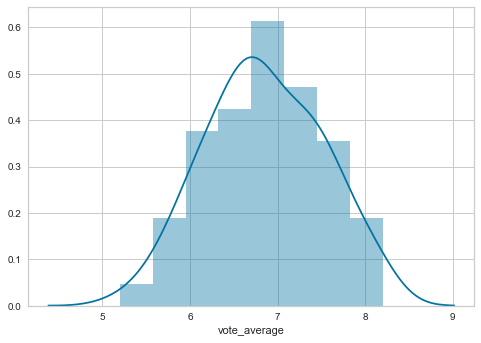

In [44]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average'], color= 'b')



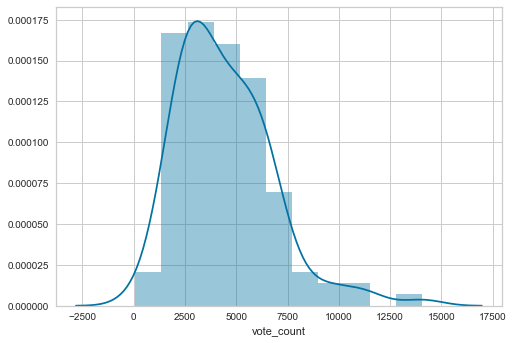

In [45]:
Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count'], color= 'b')

#change bin size for distribution. bins = np.arrange or lin space to generate some evenly spaced bins. 
#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]


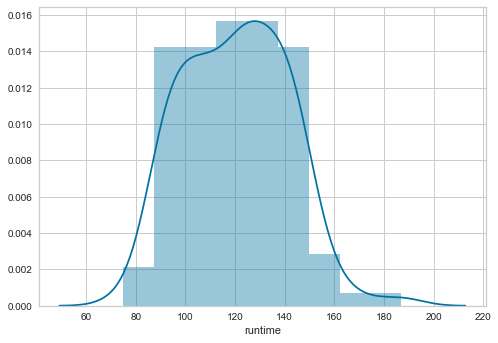

In [46]:
Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime'], color= 'b')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

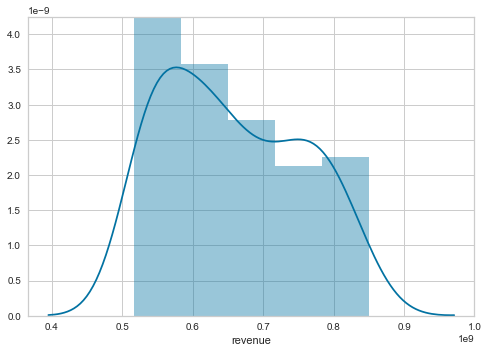

In [47]:
Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue'], color= 'b')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

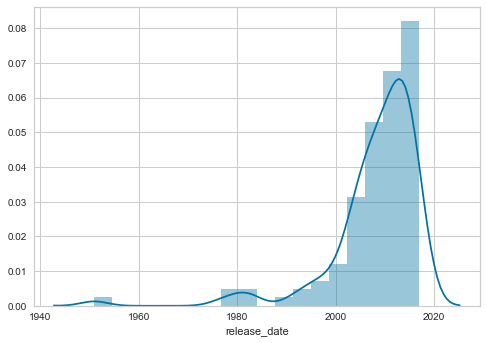

In [48]:
Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date'], color= 'b')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

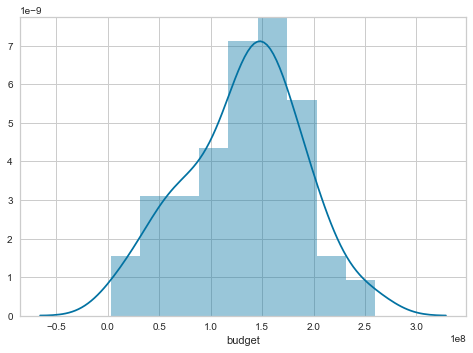

In [49]:
Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget'], color= 'b')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

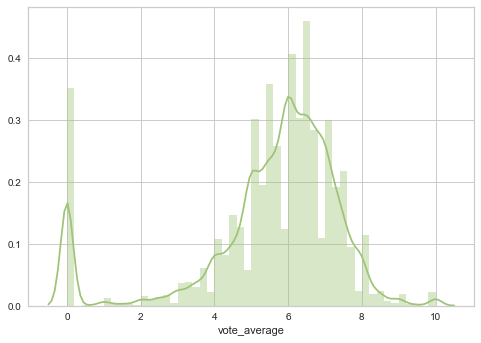

In [50]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average'], color= 'g')

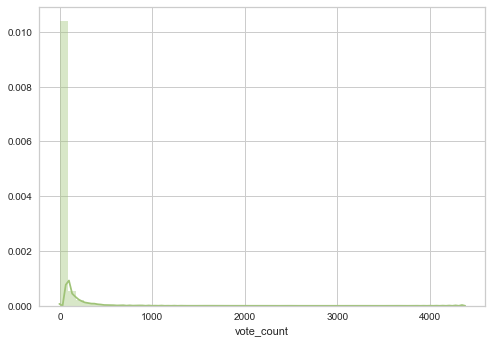

In [51]:
Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count'], color= 'g')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

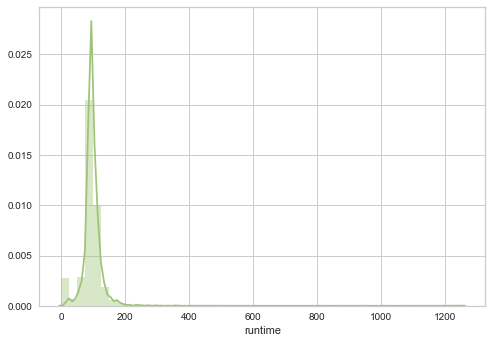

In [52]:
Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime'], color= 'g')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

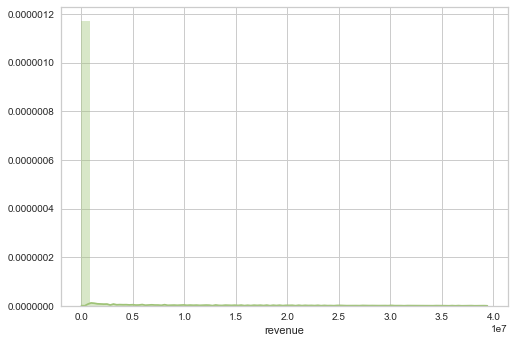

In [53]:
Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue'], color= 'g')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

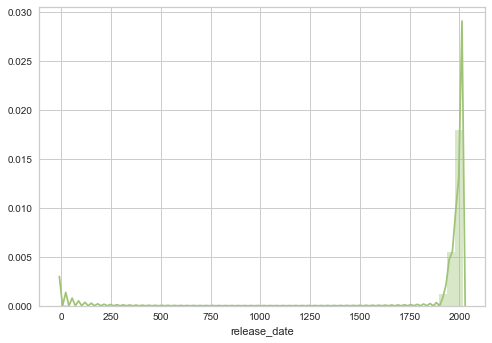

In [54]:
Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date'], color= 'g')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

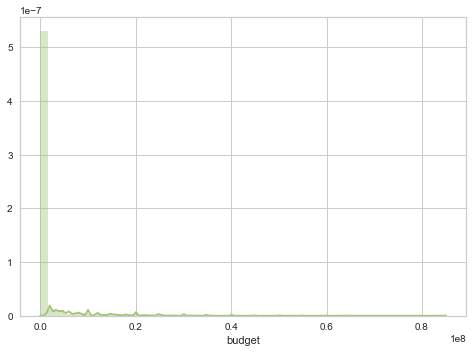

In [55]:
Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget'], color= 'g')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

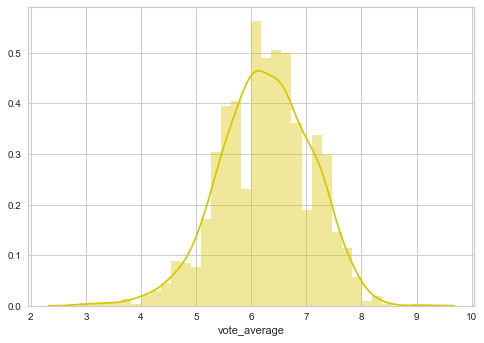

In [56]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average'], color= 'y')

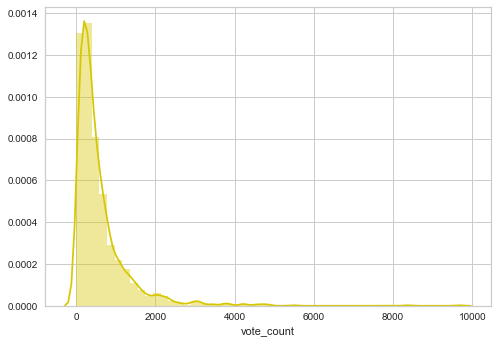

In [57]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count'], color= 'y')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

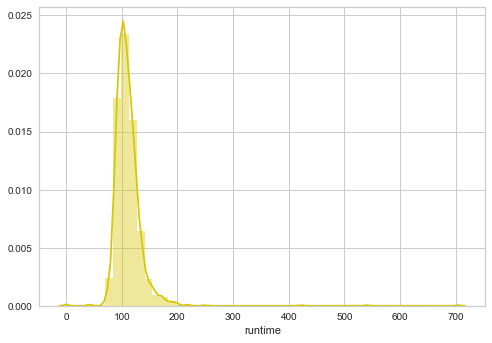

In [58]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime'], color= 'y')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

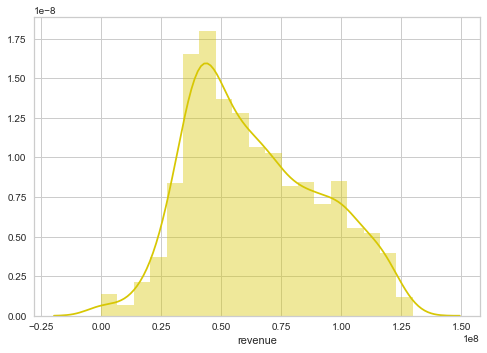

In [59]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue'], color= 'y')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

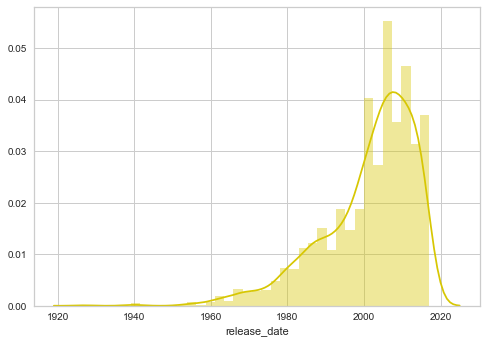

In [60]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date'], color= 'y')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

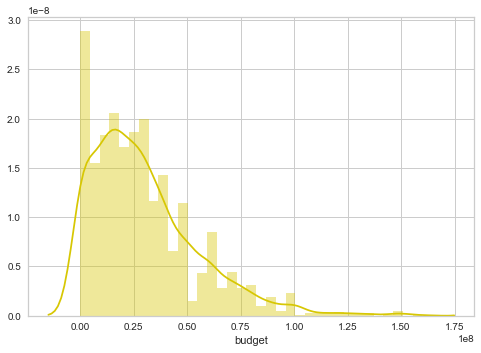

In [61]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget'], color= 'y')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

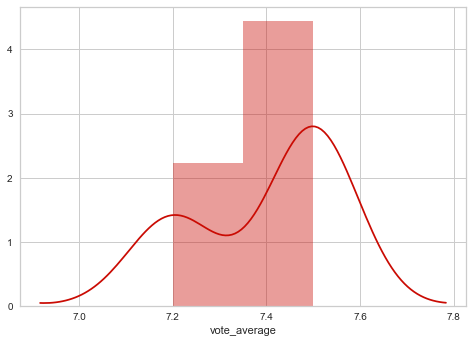

In [62]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average'], color= 'r')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

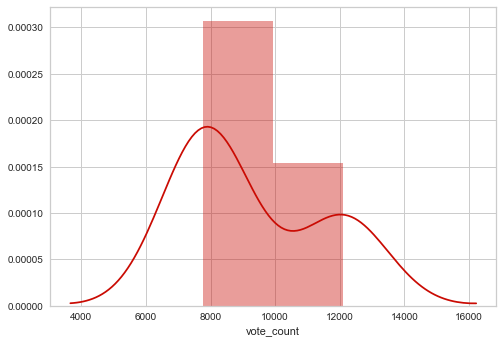

In [63]:

Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count'], color= 'r')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

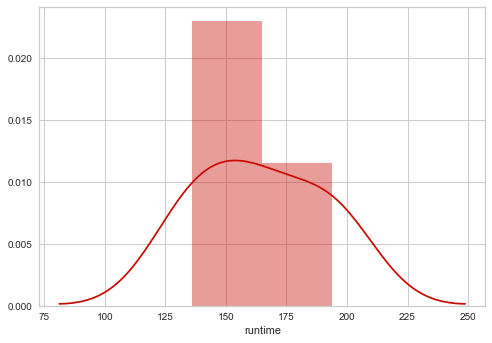

In [64]:

Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime'], color= 'r')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

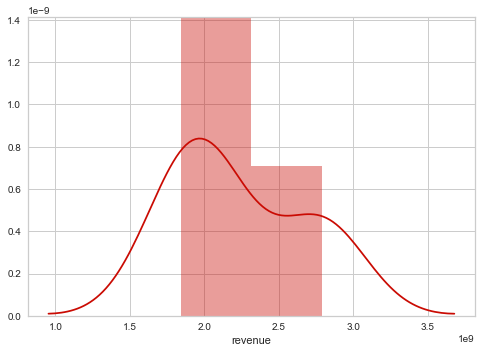

In [65]:

Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue'], color= 'r')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

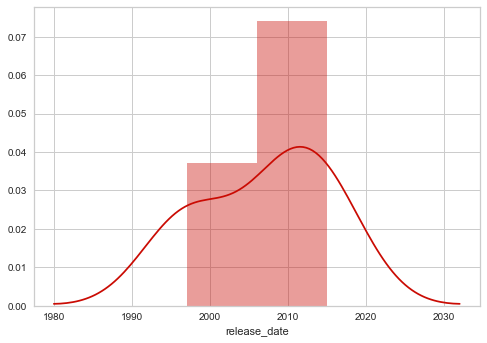

In [66]:

Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date'], color= 'r')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

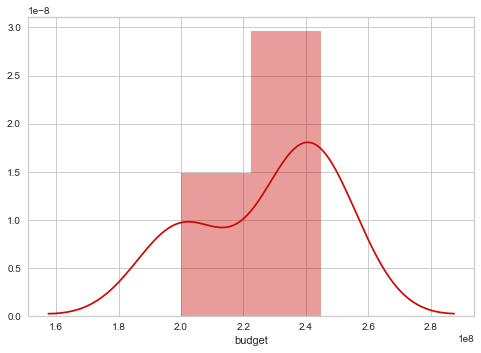

In [67]:

Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget'], color= 'r')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

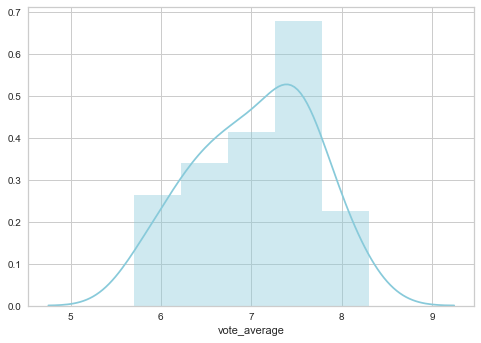

In [68]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average'], color= 'c')

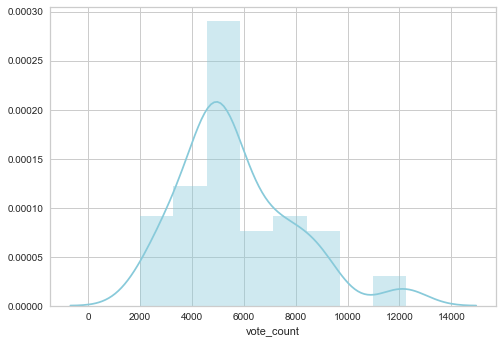

In [69]:
Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count'], color= 'c')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

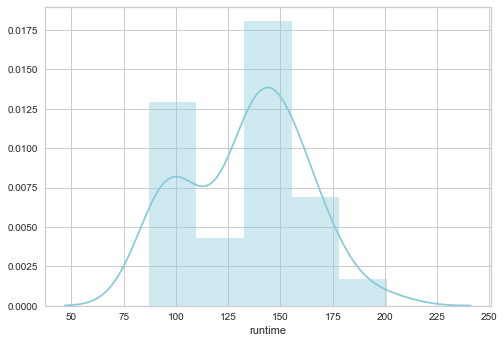

In [70]:
Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime'], color= 'c')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

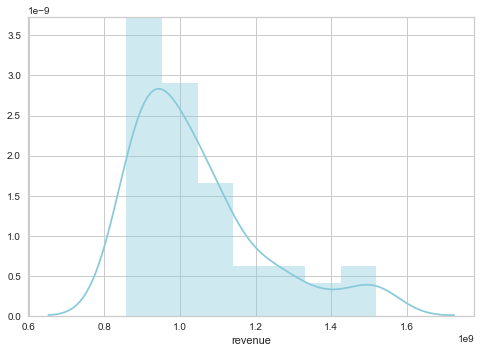

In [71]:
Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue'], color= 'c')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

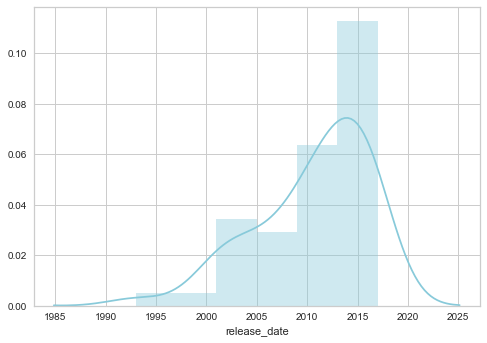

In [72]:
Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date'], color= 'c')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

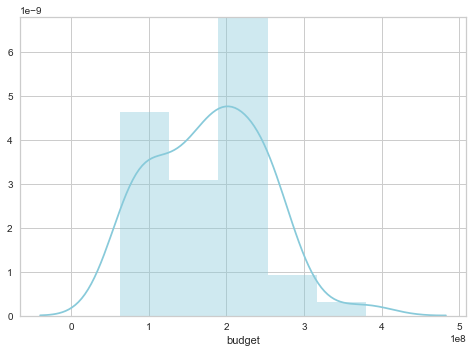

In [73]:
Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget'], color= 'c')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

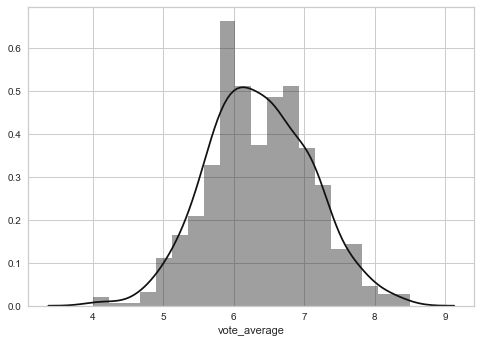

In [74]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average'], color= 'k')

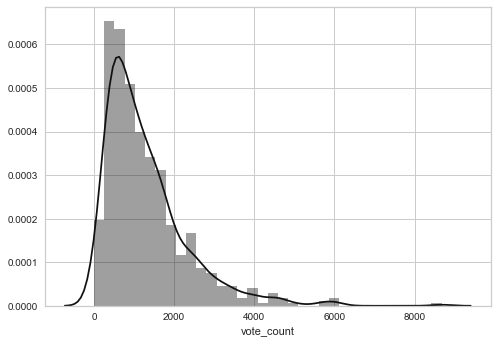

In [75]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count'], color= 'k')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

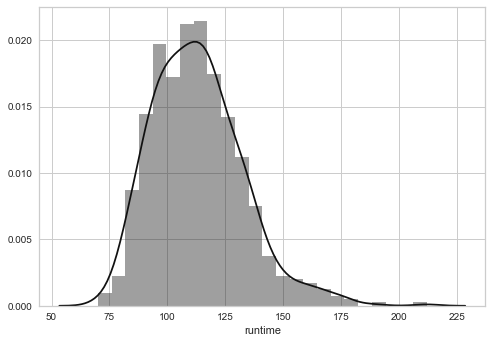

In [76]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime'], color= 'k')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

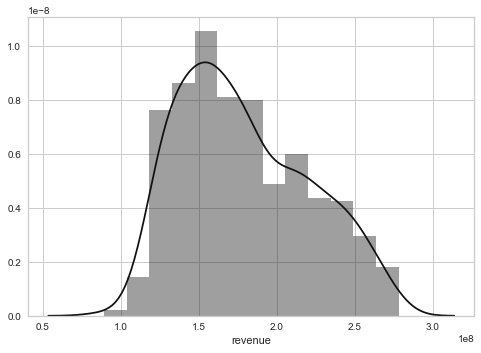

In [77]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue'], color= 'k')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

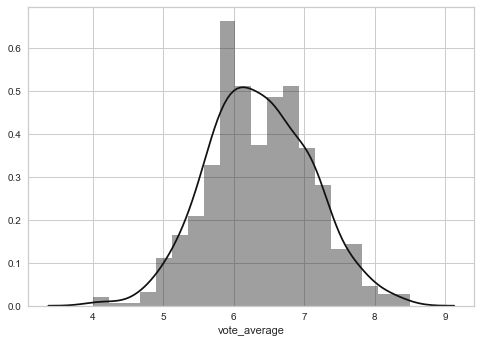

In [78]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average'], color= 'k')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

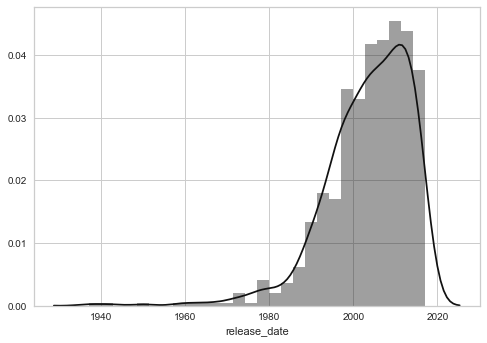

In [79]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date'], color= 'k')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

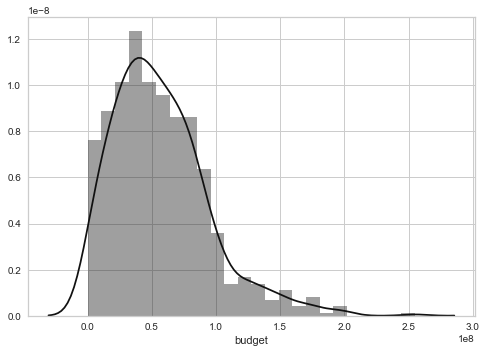

In [80]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget'], color= 'k')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

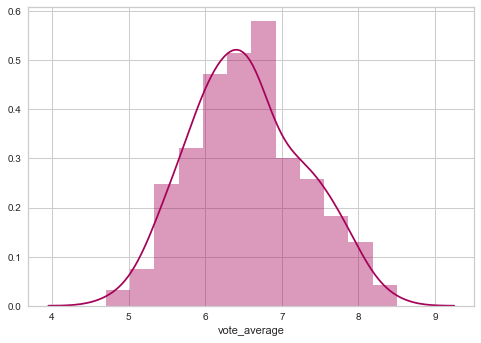

In [81]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average'], color= 'm')

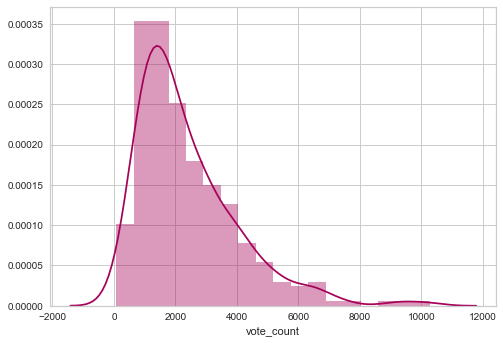

In [82]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count'], color= 'm')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

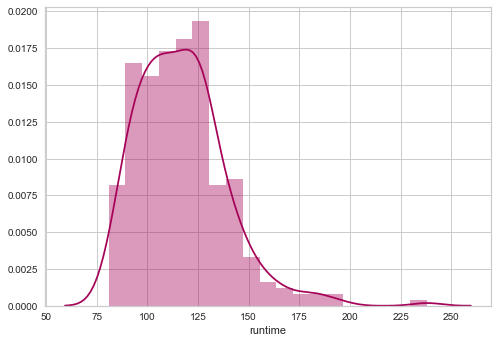

In [83]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime'], color= 'm')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

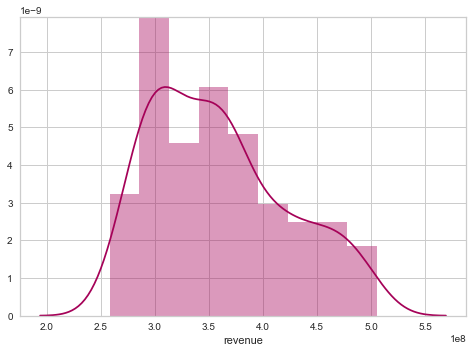

In [84]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue'], color= 'm')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

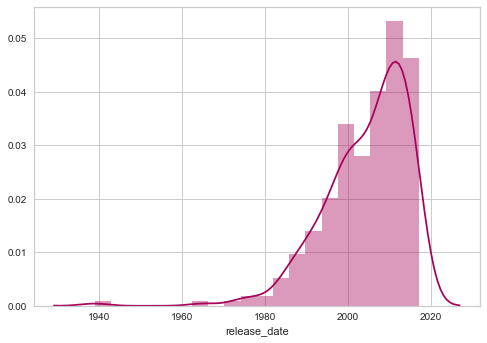

In [85]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date'], color= 'm')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

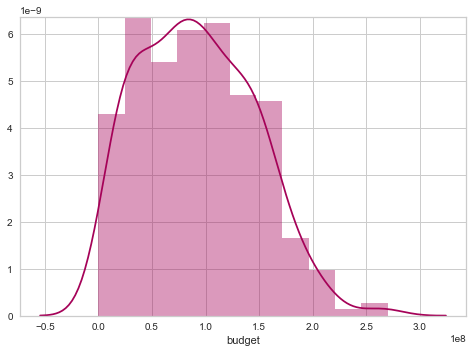

In [86]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget'], color= 'm')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]